# Projeto Machine Learning 

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Importando Bibliotecas 

In [93]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix 
import graphviz
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Carregando Dados

In [94]:
dados = pd.read_csv('dados/soybean.csv')

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

### Pré-processamento dos dados

In [95]:
dados_LabelEncoding = dados

In [96]:
dados.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


Formato dos dados

In [97]:
print('Quantidade de Linhas: ', dados.shape[0])
print('Quantidade de Colunas: ', dados.shape[1])

Quantidade de Linhas:  683
Quantidade de Colunas:  36


Tipos dos dados 

In [98]:
dados.dtypes

date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves             object
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external-decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit-spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
class              object
dtype: object

O método utilizado abaixo é um procedimento de pré-processamento chamado "Label Encoding" ou "Codificação de Rótulos". O Label Encoding é uma técnica usada para transformar variáveis categóricas (ou seja, dados em formato de texto ou rótulos) em valores numéricos, tornando-os adequados para serem usados em algoritmos de aprendizado de máquina que requerem valores numéricos como entrada.

In [99]:
label_encoders = []
for i in range(dados_LabelEncoding.shape[1]):
    label_encoder = LabelEncoder()
    dados_LabelEncoding.iloc[:, i] = label_encoder.fit_transform(dados_LabelEncoding.iloc[:, i])
    label_encoders.append(label_encoder)

C:\Users\rafae\AppData\Local\Temp\ipykernel_12008\2426077517.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados_LabelEncoding.iloc[:, i] = label_encoder.fit_transform(dados_LabelEncoding.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_12008\2426077517.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dados_LabelEncoding.iloc[:, i] = label_encoder.fit_transform(dados_LabelEncoding.iloc[:, i])
C:\Users\rafae\AppData\Local\Temp\ipykernel_12008\2426077517.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` 

In [100]:
dados_LabelEncoding.head

<bound method NDFrame.head of      date  plant-stand  precip  temp  hail  crop-hist  area-damaged  severity  \
0       6            2       1     3     2          4             1         2   
1       2            2       1     3     2          3             2         3   
2       3            2       1     3     2          4             2         3   
3       3            2       1     3     2          4             2         3   
4       6            2       1     3     2          3             2         2   
..    ...          ...     ...   ...   ...        ...           ...       ...   
678     1            0       0     0     0          0             3         0   
679     1            1       0     2     0          1             2         0   
680     4            1       0     2     0          1             2         0   
681     1            1       0     2     0          4             4         0   
682     4            1       0     2     0          4             4         0  

#### Mapa de calor

<Axes: >

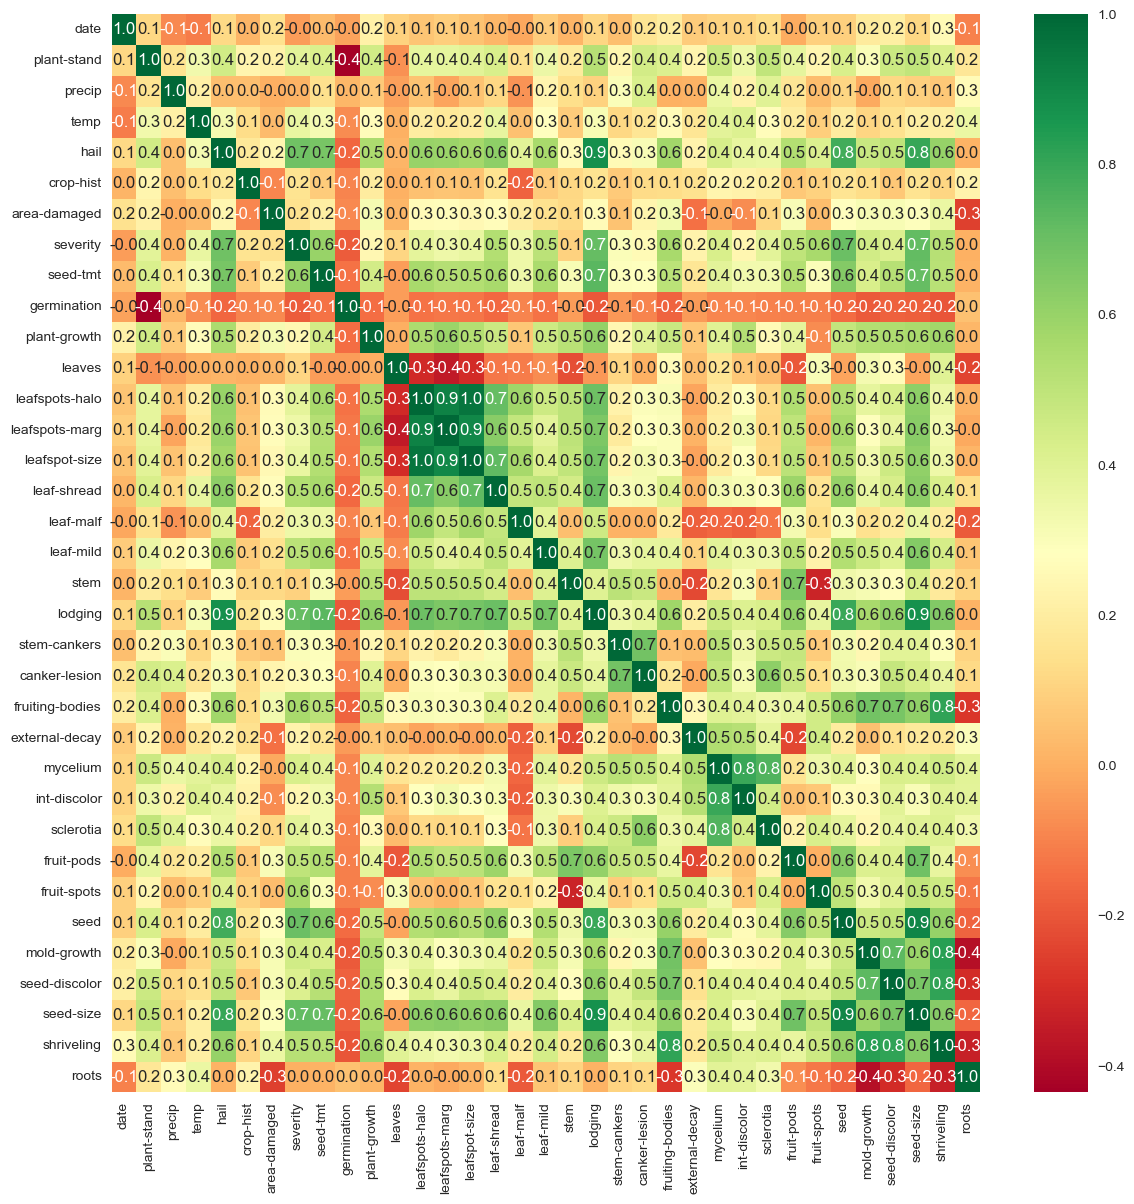

In [101]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dados_LabelEncoding.iloc[:, :-1].corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

#### Transformação dos dados 

Divisão dos dados que serão usados para o  modelo e a classe

In [102]:
previsores = dados_LabelEncoding.iloc[:, :-1]
classe = dados_LabelEncoding.iloc[:, -1]

Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)

In [103]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

## Métodos 

### Naive Bayes

Criaçao e treinamento do modelo 

In [104]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

Previsões

In [105]:
previsoes_NaiveBayes = naive_bayes.predict(X_teste)

### Árvore de decisão 

Criaçao e treinamento do modelo 

In [106]:
Arvore = DecisionTreeClassifier()
Arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

Exportação da árvore de decisão para o formato .dot

In [107]:
export_graphviz(Arvore, out_file = 'tree.dot')

Previsões

In [108]:
previsoes_Arvore = Arvore.predict(X_teste)

### Seleção de atributos  

Criaçao e treinamento do modelo

In [109]:
svm = SVC(random_state=50)
svm.fit(X_treinamento, y_treinamento)

SVC(random_state=50)

Previsões

In [110]:
previsoes_Selecao = svm.predict(X_teste)

Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes

In [111]:
forest = ExtraTreesClassifier()
forest.fit(X_treinamento, y_treinamento)
importancias = forest.feature_importances_
importancias

array([0.04915734, 0.01741025, 0.03483426, 0.02665252, 0.02473167,
       0.01837052, 0.02727464, 0.0256584 , 0.01755143, 0.01502747,
       0.02481213, 0.01652428, 0.03689493, 0.05418992, 0.05527186,
       0.02731511, 0.01433643, 0.04063347, 0.02795844, 0.00914634,
       0.0356331 , 0.04134214, 0.03374996, 0.03614848, 0.0082012 ,
       0.03996716, 0.01889914, 0.05122558, 0.0408957 , 0.02899243,
       0.02412125, 0.01980149, 0.02282458, 0.01216849, 0.02227786])

Criação de nova base de dados utilizando somente os atributos mais importantes

In [112]:
X_treinamento2 = X_treinamento.iloc[:, [0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 25, 27, 28, 29, 30]]
X_teste2 = X_teste.iloc[:, [0, 2, 3, 4, 6, 7, 10, 12, 13, 14, 15, 17, 18, 20, 21, 22, 23, 25, 27, 28, 29, 30]]

Criar de outro modelo com a base de dados reduzida

In [113]:
svm2_Selecao = SVC(random_state=50)
svm2_Selecao.fit(X_treinamento2, y_treinamento)

SVC(random_state=50)

Previsões

In [114]:
previsoes2_Selecao = svm2_Selecao.predict(X_teste2)

### Instancias

Criaçao e treinamento do modelo

In [115]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=1)

Previsões

In [116]:
previsoes_Instancias = knn.predict(X_teste)

### Random Forest

Criação e treinamento do modelo

In [117]:
forest = RandomForestClassifier(n_estimators = 150)
forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=150)

Previsões

In [118]:
previsoes_Forest = forest.predict(X_teste)

### GBM

Criação e treinamento do modelo

In [119]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=50)
gbm.fit(X_treinamento, y_treinamento)

GradientBoostingClassifier(learning_rate=0.05, random_state=50)

Previsões 

In [120]:
previsoes_GBM = gbm.predict(X_teste)

<hr style="border: none; height: 2px; background-color: black; margin: 0;">

## Resultados 

### Naive Bayes

Geração da matriz de confusão

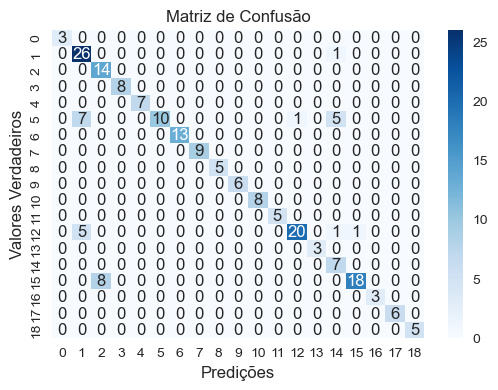

In [121]:
confusao_NaiveBayes = confusion_matrix(y_teste, previsoes_NaiveBayes)

df_NaiveBayes = pd.DataFrame(confusao_NaiveBayes)
plt.figure(figsize=(6, 4))
sns.heatmap(df_NaiveBayes, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [122]:
accuracy_NaiveBayes = accuracy_score(y_teste, previsoes_NaiveBayes)
accuracy_NaiveBayes

0.8585365853658536

Precisão

In [123]:
precision_NaiveBayes = precision_score(y_teste, previsoes_NaiveBayes, average='macro')
precision_NaiveBayes

0.9326486071638427

Recall

In [124]:
recall_NaiveBayes = recall_score(y_teste, previsoes_NaiveBayes, average='macro')
recall_NaiveBayes

0.9384628423530025

F1-Score

In [125]:
f1_NaiveBayes = f1_score(y_teste, previsoes_NaiveBayes, average='macro')
f1_NaiveBayes

0.9202020202020201

### Árvore de decisão

 Geração da matriz de confusão 

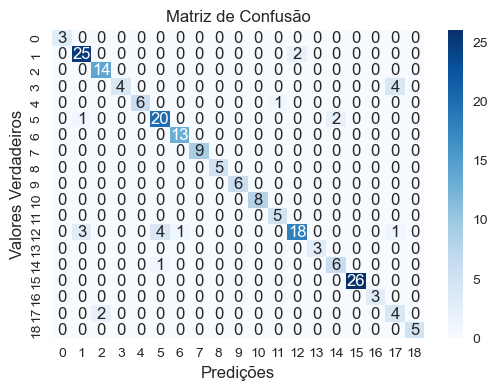

In [126]:
confusao_Arvore = confusion_matrix(y_teste, previsoes_Arvore)

df_Arvore = pd.DataFrame(confusao_Arvore)
plt.figure(figsize=(6, 4))
sns.heatmap(df_Arvore, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [127]:
accuracy_Arvore = accuracy_score(y_teste, previsoes_Arvore)
accuracy_Arvore

0.8926829268292683

Precisão

In [128]:
precision_Arvore = precision_score(y_teste, previsoes_Arvore, average='macro')
precision_Arvore

0.9154430616771814

Recall

In [129]:
recall_Arvore = recall_score(y_teste, previsoes_Arvore, average='macro')
recall_Arvore

0.9127952732071726

F1-Score

In [130]:
f1_Arvore = f1_score(y_teste, previsoes_Arvore, average='macro')
f1_Arvore

0.9063480027085852

### Seleção de atributos  

Geração da matriz de confusão

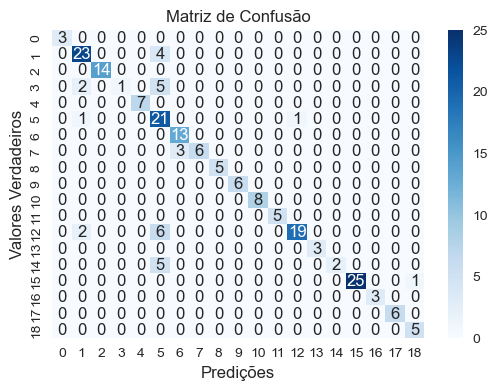

In [131]:
confusao_Selecao = confusion_matrix(y_teste, previsoes_Selecao)

df_Selecao = pd.DataFrame(confusao_Selecao)
plt.figure(figsize=(6, 4))
sns.heatmap(df_Selecao, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [132]:
accuracy_Selecao = accuracy_score(y_teste, previsoes_Selecao)
accuracy_Selecao

0.8536585365853658

Precisão

In [133]:
precision_Selecao = precision_score(y_teste, previsoes_Selecao, average='macro')
precision_Selecao

0.9436556329849012

Recall

In [134]:
recall_Selecao = recall_score(y_teste, previsoes_Selecao, average='macro')
recall_Selecao

0.8688167604071495

F1-Score

In [135]:
f1_Selecao = f1_score(y_teste, previsoes_Selecao, average='macro')
f1_Selecao

0.8712539858641979

Geração da matriz de confusão com os dados mais importantes 

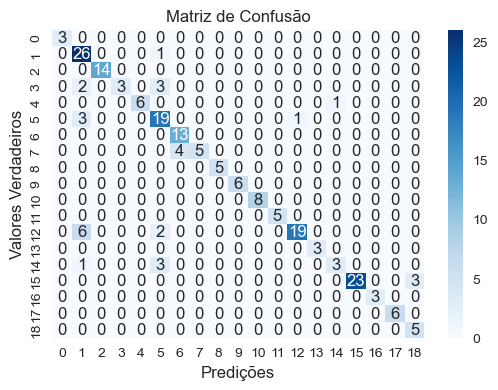

In [136]:
confusao2_Selecao = confusion_matrix(y_teste, previsoes2_Selecao)

df_Selecao2 = pd.DataFrame(confusao2_Selecao)
plt.figure(figsize=(6, 4))
sns.heatmap(df_Selecao2, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [137]:
accuracy2_Selecao = accuracy_score(y_teste, previsoes2_Selecao)
accuracy2_Selecao

0.8536585365853658

Precisão

In [138]:
precision2_Selecao = precision_score(y_teste, previsoes2_Selecao, average='macro')
precision2_Selecao

0.9185519914336926

Recall

In [139]:
recall2_Selecao = recall_score(y_teste, previsoes2_Selecao, average='macro')
recall2_Selecao

0.8733494131091385

F1-Score

In [140]:
f12_Selecao = f1_score(y_teste, previsoes2_Selecao, average='macro')
f12_Selecao

0.8766607027308844

### Instancias

Geração da matriz de confunsão 

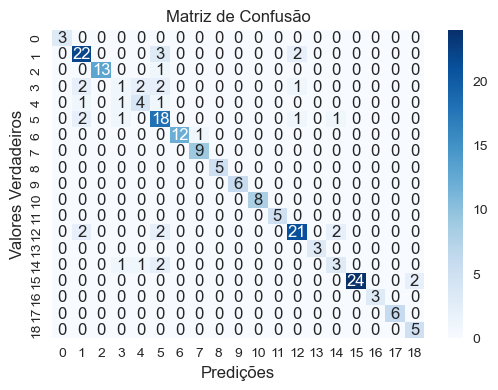

In [141]:
confusao_Instancias = confusion_matrix(y_teste, previsoes_Instancias)

df_Instancias = pd.DataFrame(confusao_Instancias)
plt.figure(figsize=(6, 4))
sns.heatmap(df_Instancias, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [142]:
accuracy_Instancias = accuracy_score(y_teste, previsoes_Instancias)
accuracy_Instancias

0.8341463414634146

Precisão

In [143]:
precision_Instancias = precision_score(y_teste, previsoes_Instancias, average='macro')
precision_Instancias

0.850264454239046

Recall

In [144]:
recall_Instancias = recall_score(y_teste, previsoes_Instancias, average='macro')
recall_Instancias

0.8565750822615811

F1-Score

In [145]:
f1_Instancias = f1_score(y_teste, previsoes_Instancias, average='macro')
f1_Instancias

0.849948036984048

### Random Forest

Geração da matriz de confusão 

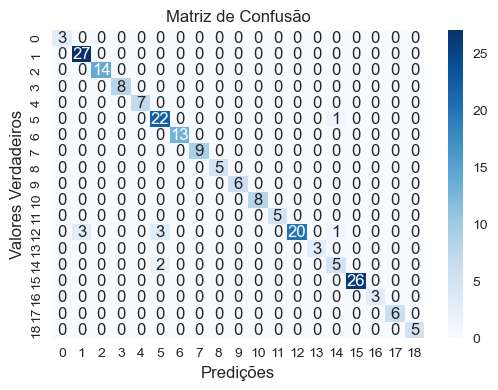

In [147]:
confusao_Forest = confusion_matrix(y_teste, previsoes_Forest)

df_Forest = pd.DataFrame(confusao_Forest)
plt.figure(figsize=(6, 4))
sns.heatmap(df_Forest, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [156]:
accuracy_Forest = accuracy_score(y_teste, previsoes_Forest)
accuracy_Forest

0.9512195121951219

Precisão

In [157]:
precision_Forest = precision_score(y_teste, previsoes_Forest, average='macro')
precision_Forest

0.9699526594263437

Recall

In [158]:
recall_Forest = recall_score(y_teste, previsoes_Forest, average='macro')
recall_Forest

0.9690288523240468

F1-Score

In [159]:
f1_Forest = f1_score(y_teste, previsoes_Forest, average='macro')
f1_Forest

0.9680377876381885

### GBM

Geração do gráfico

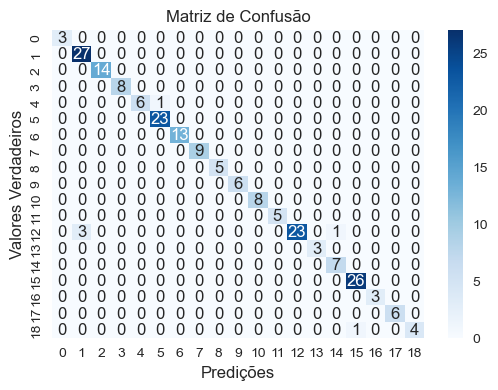

In [160]:
confusao_GBM = confusion_matrix(y_teste, previsoes_GBM)

df_GBM = pd.DataFrame(confusao_GBM)
plt.figure(figsize=(6, 4))
sns.heatmap(df_GBM, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

Acurácia

In [161]:
accuracy_GBM = accuracy_score(y_teste, previsoes_GBM)
accuracy_GBM

0.9707317073170731

Precisão

In [162]:
precision_GBM = precision_score(y_teste, previsoes_GBM, average='macro')
precision_GBM

0.9840155945419103

Recall

In [163]:
recall_GBM = recall_score(y_teste, previsoes_GBM, average='macro')
recall_GBM

0.9741576162628794

F1-Score

In [164]:
f1_GBM = f1_score(y_teste, previsoes_GBM, average='macro')
f1_GBM

0.9775012129515156

<hr style="border: none; height: 2px; background-color: black; margin: 0;">